# BLINKIT_SALES_ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Blinkit_products = pd.read_csv("blinkit_products.csv")
Blinkit_orders = pd.read_csv("blinkit_orders.csv")
Blinkit_order_items = pd.read_csv("blinkit_order_items.csv")

In [3]:
Blinkit_delivery = pd.read_csv("blinkit_delivery_performance.csv")
Blinkit_customer = pd.read_csv("blinkit_customers.csv")
Blinkit_customer_feedback = pd.read_csv("blinkit_customer_feedback.csv")

**Merging Multiple Tables**

In [4]:
Blinkit_orders.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id'],
      dtype='object')

In [5]:
Blinkit_order_items.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price'], dtype='object')

In [6]:
All_orders = pd.merge(Blinkit_orders, Blinkit_order_items, on='order_id', how='outer')

In [7]:
All_orders.head(2)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,product_id,quantity,unit_price
0,60465,15808945,2024-10-23 05:23:29,2024-10-23 05:34:29,2024-10-23 05:39:29,On Time,589.47,UPI,58998,3943,361361,2,826.21
1,2237858,48281892,2023-04-02 03:45:11,2023-04-02 04:00:11,2023-04-02 04:03:11,On Time,3835.26,Wallet,97945,1987,585299,1,799.46


In [8]:
Products_orders = pd.merge(Blinkit_products, All_orders, on='product_id', how='outer')

In [9]:
Products_orders.head(2)

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,...,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,quantity,unit_price
0,4452,Baby Wipes,Baby Care,Morar-Mistry,169.88,242.69,30.0,365,27,100,...,2024-10-24 21:20:11,2024-10-24 21:33:11,2024-10-24 21:38:11,On Time,2993.04,Card,49116,6635,1,169.88
1,4452,Baby Wipes,Baby Care,Morar-Mistry,169.88,242.69,30.0,365,27,100,...,2023-04-01 09:22:52,2023-04-01 09:35:52,2023-04-01 09:39:52,On Time,4026.32,Card,35435,7170,3,169.88


In [10]:
Blinkit_customer.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [11]:
Blinkit_customer_feedback.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')

In [12]:
Blinkit_delivery.columns

Index(['order_id', 'delivery_partner_id', 'promised_time', 'actual_time',
       'delivery_time_minutes', 'distance_km', 'delivery_status',
       'reasons_if_delayed'],
      dtype='object')

In [13]:
Customer_details = pd.merge(Blinkit_customer, Blinkit_customer_feedback, on='customer_id', how='outer')

In [14]:
Customer_delivery = pd.merge(Customer_details, Blinkit_delivery, on='order_id', how='outer')

In [15]:
Customer_delivery.head(2)

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,...,feedback_category,sentiment,feedback_date,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,15808945,Vrinda Khurana,wsekhon@example.com,918358677006,"H.No. 515, Balay Path\nAmravati 503358",Gangtok,890545,2024-04-10,New,6,...,Product Quality,Neutral,2024-10-23,58998.0,2024-10-23 05:34:29,2024-10-23 05:39:29,5.0,3.97,On Time,Traffic
1,48281892,Teerth Mukherjee,toordakshesh@example.org,911236990834,H.No. 706\nLal Path\nVisakhapatnam-582362,Vellore,691199,2023-04-11,New,6,...,Delivery,Neutral,2023-04-02,97945.0,2023-04-02 04:00:11,2023-04-02 04:03:11,3.0,3.86,On Time,Traffic


In [16]:
Blinkit_Sales = pd.merge(Products_orders, Customer_delivery, on='customer_id', how='outer')

In [17]:
Blinkit_Sales.columns

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level', 'order_id_x', 'customer_id', 'order_date',
       'promised_delivery_time', 'actual_delivery_time', 'delivery_status_x',
       'order_total', 'payment_method', 'delivery_partner_id_x', 'store_id',
       'quantity', 'unit_price', 'customer_name', 'email', 'phone', 'address',
       'area', 'pincode', 'registration_date', 'customer_segment',
       'total_orders', 'avg_order_value', 'feedback_id', 'order_id_y',
       'rating', 'feedback_text', 'feedback_category', 'sentiment',
       'feedback_date', 'delivery_partner_id_y', 'promised_time',
       'actual_time', 'delivery_time_minutes', 'distance_km',
       'delivery_status_y', 'reasons_if_delayed'],
      dtype='object')

**Final Dataset after joining all the tables**

In [18]:
Blinkit_Sales.head(5)   # give first five rows of dataset

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,...,feedback_category,sentiment,feedback_date,delivery_partner_id_y,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status_y,reasons_if_delayed
0,398340.0,Instant Noodles,Instant & Frozen Food,"Nadig, Zachariah and Soni",651.93,1086.55,40.0,180.0,11.0,56.0,...,Delivery,Negative,2024-10-10,38462.0,2024-10-10 13:26:15,2024-10-10 13:28:15,2.0,1.78,On Time,Traffic
1,398340.0,Instant Noodles,Instant & Frozen Food,"Nadig, Zachariah and Soni",651.93,1086.55,40.0,180.0,11.0,56.0,...,App Experience,Negative,2024-07-11,11517.0,2024-07-11 03:48:42,2024-07-11 04:01:42,13.0,3.99,Slightly Delayed,Traffic
2,803607.0,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365.0,21.0,98.0,...,Delivery,Negative,2024-10-10,38462.0,2024-10-10 13:26:15,2024-10-10 13:28:15,2.0,1.78,On Time,Traffic
3,803607.0,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365.0,21.0,98.0,...,App Experience,Negative,2024-07-11,11517.0,2024-07-11 03:48:42,2024-07-11 04:01:42,13.0,3.99,Slightly Delayed,Traffic
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
pd.set_option("display.max_columns", None) # helps in showing all the columns

In [20]:
Blinkit_Sales.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id_x,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,payment_method,delivery_partner_id_x,store_id,quantity,unit_price,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,feedback_id,order_id_y,rating,feedback_text,feedback_category,sentiment,feedback_date,delivery_partner_id_y,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status_y,reasons_if_delayed
0,398340.0,Instant Noodles,Instant & Frozen Food,"Nadig, Zachariah and Soni",651.93,1086.55,40.0,180.0,11.0,56.0,5.698804e+09,31813,2024-10-10 13:10:15,2024-10-10 13:26:15,2024-10-10 13:28:15,On Time,1227.21,UPI,38462.0,8304.0,2.0,651.93,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,950262.0,5.698804e+09,1.0,Customer service was not helpful.,Delivery,Negative,2024-10-10,38462.0,2024-10-10 13:26:15,2024-10-10 13:28:15,2.0,1.78,On Time,Traffic
1,398340.0,Instant Noodles,Instant & Frozen Food,"Nadig, Zachariah and Soni",651.93,1086.55,40.0,180.0,11.0,56.0,5.698804e+09,31813,2024-10-10 13:10:15,2024-10-10 13:26:15,2024-10-10 13:28:15,On Time,1227.21,UPI,38462.0,8304.0,2.0,651.93,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,7669412.0,7.997347e+09,3.0,Product was damaged during delivery.,App Experience,Negative,2024-07-11,11517.0,2024-07-11 03:48:42,2024-07-11 04:01:42,13.0,3.99,Slightly Delayed,Traffic
2,803607.0,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365.0,21.0,98.0,7.997347e+09,31813,2024-07-11 03:32:42,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517.0,1071.0,3.0,949.73,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,950262.0,5.698804e+09,1.0,Customer service was not helpful.,Delivery,Negative,2024-10-10,38462.0,2024-10-10 13:26:15,2024-10-10 13:28:15,2.0,1.78,On Time,Traffic
3,803607.0,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365.0,21.0,98.0,7.997347e+09,31813,2024-07-11 03:32:42,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,11517.0,1071.0,3.0,949.73,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,7669412.0,7.997347e+09,3.0,Product was damaged during delivery.,App Experience,Negative,2024-07-11,11517.0,2024-07-11 03:48:42,2024-07-11 04:01:42,13.0,3.99,Slightly Delayed,Traffic
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ekiya Pau,fbedi@example.com,919364120886,"H.No. 336\nLad Zila, Hajipur-409871",Chinsurah,201602,2023-11-29,New,18,752.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
Blinkit_Sales.sample(5)   # select the random rows

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id_x,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,payment_method,delivery_partner_id_x,store_id,quantity,unit_price,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,feedback_id,order_id_y,rating,feedback_text,feedback_category,sentiment,feedback_date,delivery_partner_id_y,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status_y,reasons_if_delayed
4485,4452.0,Baby Wipes,Baby Care,Morar-Mistry,169.88,242.69,30.0,365.0,27.0,100.0,4.507702e+09,27955158,2023-04-23 23:54:06,2023-04-24 00:04:06,2023-04-24 00:06:06,On Time,3434.25,Card,25049.0,4275.0,3.0,169.88,Abeer Kamdar,aaggarwal@example.net,917947344705,"H.No. 535, Nair Path\nKurnool 247765",Shivpuri,950386,2024-03-16,New,13,1659.73,1253497.0,4.507702e+09,5.0,Good selection of products.,App Experience,Positive,2023-04-24,25049.0,2023-04-24 00:04:06,2023-04-24 00:06:06,2.0,4.05,On Time,Traffic
13551,18035.0,Dish Soap,Household Care,Ramesh Inc,968.94,1291.92,25.0,365.0,12.0,87.0,6.961458e+09,89704218,2024-10-26 21:31:39,2024-10-26 21:44:39,2024-10-26 21:41:39,On Time,3243.74,UPI,79623.0,4533.0,3.0,968.94,Harini Ramakrishnan,dateeiravati@example.org,917541455837,"H.No. 92\nSura Road, Medininagar 243233",Khora,706845,2023-10-07,Premium,11,1029.69,7711849.0,6.961458e+09,5.0,Will definitely order again.,Customer Service,Positive,2024-10-26,79623.0,2024-10-26 21:44:39,2024-10-26 21:41:39,-3.0,1.53,On Time,NaN
11403,721521.0,Rice,Grocery & Staples,"Ramanathan, Agarwal and Baria",417.39,491.05,15.0,365.0,20.0,72.0,9.305358e+09,76212152,2023-05-12 22:06:22,2023-05-12 22:25:22,2023-05-12 22:22:22,On Time,652.58,Wallet,84853.0,6424.0,2.0,417.39,Mitali Kapoor,ektabava@example.com,912444876992,20/514\nRaju Zila\nMangalore 950685,Agra,685797,2024-10-11,Premium,13,1767.81,5328212.0,8.071835e+08,3.0,Not worth the price I paid.,Product Quality,Negative,2023-09-05,23145.0,2023-09-05 12:12:41,2023-09-05 12:18:41,6.0,1.27,Slightly Delayed,Traffic
4707,707935.0,Cat Food,Pet Care,"Anne, Mammen and Khatri",820.90,1262.92,35.0,365.0,30.0,97.0,8.348126e+09,29584848,2023-12-08 18:15:56,2023-12-08 18:27:56,2023-12-08 18:37:56,Slightly Delayed,3498.69,UPI,33620.0,4692.0,3.0,820.90,Lucky Chada,devganesan@example.org,911154995125,H.No. 95\nIyengar Circle\nDhule-728048,Dehri,469757,2024-10-03,Premium,11,1212.04,4114443.0,1.969446e+09,1.0,Items were missing from my order.,Delivery,Negative,2023-09-05,93399.0,2023-09-05 20:05:27,2023-09-05 20:09:27,4.0,4.35,On Time,Traffic
2360,120532.0,Wheat Flour,Grocery & Staples,Nazareth Ltd,697.53,820.62,15.0,365.0,29.0,95.0,8.891726e+09,13871547,2023-05-16 21:08:18,2023-05-16 21:23:18,2023-05-16 21:22:18,On Time,2149.76,Wallet,16971.0,1423.0,3.0,697.53,Anthony Dhawan,nimrat66@example.org,916397162979,H.No. 30\nPatla Nagar\nBarasat 711179,Bhilwara,626053,2023-06-17,Premium,8,200.43,7288666.0,8.891726e+09,3.0,Taste was not as expected.,Delivery,Negative,2023-05-16,16971.0,2023-05-16 21:23:18,2023-05-16 21:22:18,-1.0,4.44,On Time,NaN


In [22]:
Blinkit_Sales.columns   # Show all the cols name

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level', 'order_id_x', 'customer_id', 'order_date',
       'promised_delivery_time', 'actual_delivery_time', 'delivery_status_x',
       'order_total', 'payment_method', 'delivery_partner_id_x', 'store_id',
       'quantity', 'unit_price', 'customer_name', 'email', 'phone', 'address',
       'area', 'pincode', 'registration_date', 'customer_segment',
       'total_orders', 'avg_order_value', 'feedback_id', 'order_id_y',
       'rating', 'feedback_text', 'feedback_category', 'sentiment',
       'feedback_date', 'delivery_partner_id_y', 'promised_time',
       'actual_time', 'delivery_time_minutes', 'distance_km',
       'delivery_status_y', 'reasons_if_delayed'],
      dtype='object')

In [23]:
Blinkit_Sales.isnull().sum()  # check null values in every columns

product_id                 328
product_name               328
category                   328
brand                      328
price                      328
mrp                        328
margin_percentage          328
shelf_life_days            328
min_stock_level            328
max_stock_level            328
order_id_x                 328
customer_id                  0
order_date                 328
promised_delivery_time     328
actual_delivery_time       328
delivery_status_x          328
order_total                328
payment_method             328
delivery_partner_id_x      328
store_id                   328
quantity                   328
unit_price                 328
customer_name                0
email                        0
phone                        0
address                      0
area                         0
pincode                      0
registration_date            0
customer_segment             0
total_orders                 0
avg_order_value              0
feedback

In [24]:
Blinkit_Sales.duplicated().sum()  # Check duplicated Rows

np.int64(0)

In [25]:
Blinkit_Sales[Blinkit_Sales[['product_id','product_name','category','brand']].isnull().any(axis=1)]  # Checking if cols have null values in same row

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id_x,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,payment_method,delivery_partner_id_x,store_id,quantity,unit_price,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,feedback_id,order_id_y,rating,feedback_text,feedback_category,sentiment,feedback_date,delivery_partner_id_y,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status_y,reasons_if_delayed
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ekiya Pau,fbedi@example.com,919364120886,"H.No. 336\nLad Zila, Hajipur-409871",Chinsurah,201602,2023-11-29,New,18,752.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jeet Gandhi,amrita05@example.net,916683687947,"95/861, Jaggi, Sikar-343285",Korba,298093,2024-09-19,Regular,13,1938.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,894128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chatura Agarwal,harishom@example.net,919523503339,58/69\nMallick Path\nRajahmundry 318453,Durgapur,13150,2023-07-20,Inactive,5,1323.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yadavi Rajagopalan,dipta24@example.net,912609155283,"48\nChoudhary Ganj, Gorakhpur 965066",Mango,449803,2024-03-07,Inactive,4,999.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1134585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bhavani Rau,uppalvrishti@example.com,913705629591,"61, Mitra Zila, Bhatpara-234618",Ghaziabad,553914,2024-02-06,Regular,8,1975.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98016334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Krishna Char,krishnabhavsar@example.net,919448360416,"841, Kibe Chowk, Thrissur-092044",Howrah,326443,2024-08-19,Regular,18,724.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98667584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sara Soman,salvigeetika@example.com,912270298752,01/760\nNatarajan Path\nParbhani-638480,Jaipur,439446,2024-10-27,Premium,8,1072.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99347871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert Kashyap,gnadkarni@example.net,915345369198,37/115\nKade Nagar\nBaranagar 427420,Muzaffarnagar,535677,2023-12-01,Regular,3,1535.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99424244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bhavini Mander,yashasvipalan@example.net,916324786919,800\nSubramanian Street\nDhule-015954,Mumbai,184817,2024-03-30,Premium,15,379.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
Blinkit_Sales.info()  # Basic info of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15214 entries, 0 to 15213
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              14886 non-null  float64
 1   product_name            14886 non-null  object 
 2   category                14886 non-null  object 
 3   brand                   14886 non-null  object 
 4   price                   14886 non-null  float64
 5   mrp                     14886 non-null  float64
 6   margin_percentage       14886 non-null  float64
 7   shelf_life_days         14886 non-null  float64
 8   min_stock_level         14886 non-null  float64
 9   max_stock_level         14886 non-null  float64
 10  order_id_x              14886 non-null  float64
 11  customer_id             15214 non-null  int64  
 12  order_date              14886 non-null  object 
 13  promised_delivery_time  14886 non-null  object 
 14  actual_delivery_time    14886 non-null

In [27]:
Blinkit_Sales.describe()  # Gives description of all numerical columns

,product_id,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id_x,customer_id,order_total,delivery_partner_id_x,store_id,quantity,unit_price,phone,pincode,total_orders,avg_order_value,feedback_id,order_id_y,rating,delivery_partner_id_y,delivery_time_minutes,distance_km
count,14886.000000,14886.000000,14886.000000,14886.000000,14886.000000,14886.000000,14886.000000,1.488600e+04,1.521400e+04,14886.000000,14886.000000,14886.000000,14886.000000,14886.000000,1.521400e+04,15214.000000,15214.000000,15214.000000,1.488600e+04,1.488600e+04,14886.000000,14886.000000,14886.000000,14886.000000
mean,512338.547629,494.190323,687.988924,27.763335,234.849389,20.467016,75.017668,5.023579e+09,4.986525e+07,2205.965235,50247.587330,4983.862824,2.000873,494.190323,9.150963e+11,503157.005127,10.446628,1083.826142,5.050311e+06,5.023579e+09,3.341260,50247.587330,4.364974,2.722432
std,292954.135521,297.501451,417.877309,7.415429,151.238713,5.963529,14.543471,2.850444e+09,2.927847e+07,1297.623927,28700.719081,2885.024142,0.824181,297.501451,2.938936e+09,282535.271727,5.764217,524.652135,2.842698e+06,2.850444e+09,1.197197,28700.719081,8.010776,1.287583
min,4452.000000,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000,6.046500e+04,3.181300e+04,13.250000,43.000000,1.000000,1.000000,12.320000,9.100132e+11,666.000000,1.000000,200.430000,9.470000e+02,6.046500e+04,1.000000,43.000000,-5.000000,0.500000
25%,264803.000000,229.380000,331.770000,20.000000,90.000000,15.000000,64.000000,2.530396e+09,2.285148e+07,1099.910000,25181.000000,2471.000000,1.000000,229.380000,9.125404e+11,262587.000000,6.000000,602.090000,2.670325e+06,2.530396e+09,3.000000,25181.000000,-2.000000,1.610000
50%,541459.000000,448.160000,646.440000,30.000000,365.000000,21.000000,74.000000,5.085005e+09,4.943326e+07,2110.585000,50623.000000,4970.000000,2.000000,448.160000,9.150525e+11,509489.000000,10.000000,1105.150000,5.037542e+06,5.085005e+09,4.000000,50623.000000,2.000000,2.690000
75%,753354.000000,781.080000,1065.020000,35.000000,365.000000,26.000000,88.000000,7.457306e+09,7.624731e+07,3157.370000,74373.250000,7478.000000,3.000000,781.080000,9.177343e+11,745005.000000,16.000000,1531.630000,7.508992e+06,7.457306e+09,4.000000,74373.250000,8.000000,3.860000
max,993331.000000,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000,9.998298e+09,9.989390e+07,6721.460000,99968.000000,9995.000000,3.000000,995.980000,9.199988e+11,999631.000000,20.000000,1999.830000,9.999293e+06,9.998298e+09,5.000000,99968.000000,30.000000,5.000000


# Data Cleaning

In [28]:
Blinkit_Sales = Blinkit_Sales.drop(columns=['order_id_y', 'delivery_partner_id_x', 'delivery_status_y']) # deleting the columns

In [29]:
Blinkit_Sales.columns = Blinkit_Sales.columns.str.replace('delivery_status_x', 'delivery_status')     # renaming the columns

In [30]:
Blinkit_Sales.columns = Blinkit_Sales.columns.str.replace('delivery_partner_id_y', 'delivery_partner_id')

In [31]:
Blinkit_Sales.columns = Blinkit_Sales.columns.str.replace('order_id_x', 'order_id')

In [32]:
Blinkit_Sales.fillna("unknown")   # Fill null cells by unknown

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,store_id,quantity,unit_price,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value,feedback_id,rating,feedback_text,feedback_category,sentiment,feedback_date,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,reasons_if_delayed
0,398340.0,Instant Noodles,Instant & Frozen Food,"Nadig, Zachariah and Soni",651.93,1086.55,40.0,180.0,11.0,56.0,5698803942.0,31813,2024-10-10 13:10:15,2024-10-10 13:26:15,2024-10-10 13:28:15,On Time,1227.21,UPI,8304.0,2.0,651.93,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,950262.0,1.0,Customer service was not helpful.,Delivery,Negative,2024-10-10,38462.0,2024-10-10 13:26:15,2024-10-10 13:28:15,2.0,1.78,Traffic
1,398340.0,Instant Noodles,Instant & Frozen Food,"Nadig, Zachariah and Soni",651.93,1086.55,40.0,180.0,11.0,56.0,5698803942.0,31813,2024-10-10 13:10:15,2024-10-10 13:26:15,2024-10-10 13:28:15,On Time,1227.21,UPI,8304.0,2.0,651.93,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,7669412.0,3.0,Product was damaged during delivery.,App Experience,Negative,2024-07-11,11517.0,2024-07-11 03:48:42,2024-07-11 04:01:42,13.0,3.99,Traffic
2,803607.0,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365.0,21.0,98.0,7997347191.0,31813,2024-07-11 03:32:42,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,1071.0,3.0,949.73,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,950262.0,1.0,Customer service was not helpful.,Delivery,Negative,2024-10-10,38462.0,2024-10-10 13:26:15,2024-10-10 13:28:15,2.0,1.78,Traffic
3,803607.0,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365.0,21.0,98.0,7997347191.0,31813,2024-07-11 03:32:42,2024-07-11 03:48:42,2024-07-11 04:01:42,Slightly Delayed,4498.83,Wallet,1071.0,3.0,949.73,Indrajit Pau,wakeetasehgal@example.com,911785834174,"66, Vora Chowk\nMaheshtala 376030",Sultan Pur Majra,666762,2024-04-10,Regular,18,1230.75,7669412.0,3.0,Product was damaged during delivery.,App Experience,Negative,2024-07-11,11517.0,2024-07-11 03:48:42,2024-07-11 04:01:42,13.0,3.99,Traffic
4,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,31826,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Ekiya Pau,fbedi@example.com,919364120886,"H.No. 336\nLad Zila, Hajipur-409871",Chinsurah,201602,2023-11-29,New,18,752.78,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,274207.0,Cough Syrup,Pharmacy,"Savant, Batta and Mander",328.51,410.64,20.0,365.0,25.0,51.0,3963207709.0,99893898,2024-01-04 20:24:27,2024-01-04 20:37:27,2024-01-04 21:01:27,Significantly Delayed,972.69,Cash,2029.0,1.0,328.51,Vedant Master,forumwable@example.com,916100269271,"123, Manda Circle, Dehradun 286985",Berhampore,893327,2023-11-22,New,16,365.40,819181.0,4.0,Will definitely order again.,App Experience,Positive,2024-08-31,37141.0,2024-08-31 13:27:39,2024-08-31 13:28:39,1.0,0.62,Traffic
15210,542300.0,Popcorn,Snacks & Munchies,Gulati-Tandon,255.35,392.85,35.0,90.0,11.0,66.0,8371900149.0,99893898,2024-08-31 13:11:39,2024-08-31 13:27:39,2024-08-31 13:28:39,On Time,1602.15,Card,3637.0,2.0,255.35,Vedant Master,forumwable@example.com,916100269271,"123, Manda Circle, Dehradun 286985",Berhampore,893327,2023-11-22,Ne

# UNIVARIATE ANALYSIS

* COUNT PLOT FOR CATEGORY COUNT

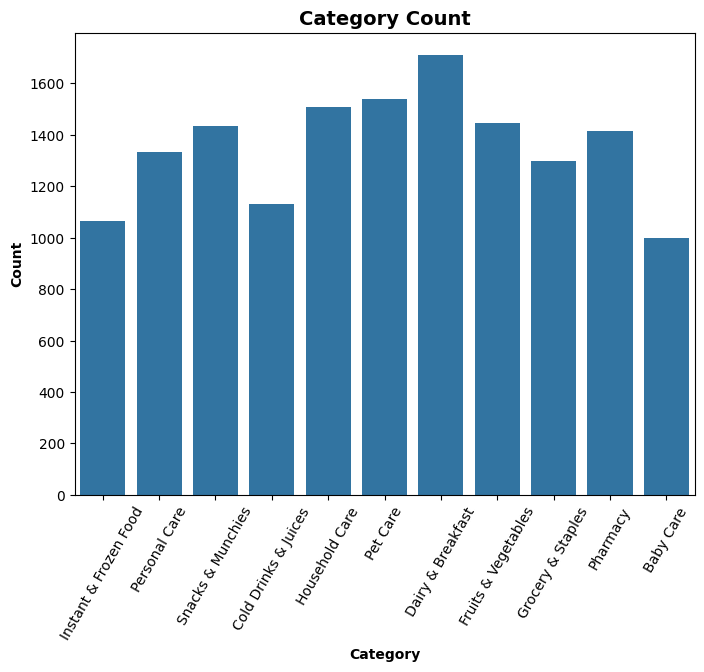

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='category', data=Blinkit_Sales)
plt.title("Category Count",fontsize=14,fontweight='bold')
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.xticks(rotation=60)
plt.show()

-> Conclusion of the above graph

1. Highest Category Count is for Dairy & Breakfast, Snacks & Munchies, Pet Care, Fruits & Vegitables and Grocery & Staples. Which shows that People are more engaged in food-related Categories.
2. Household Care, pharmacy, Personal Care had Medium Category Count.
3. Baby Care, Frozen Food, Beverages had Least Category Count.

* COUNT PLOT FOR TOP 15 BRANDS

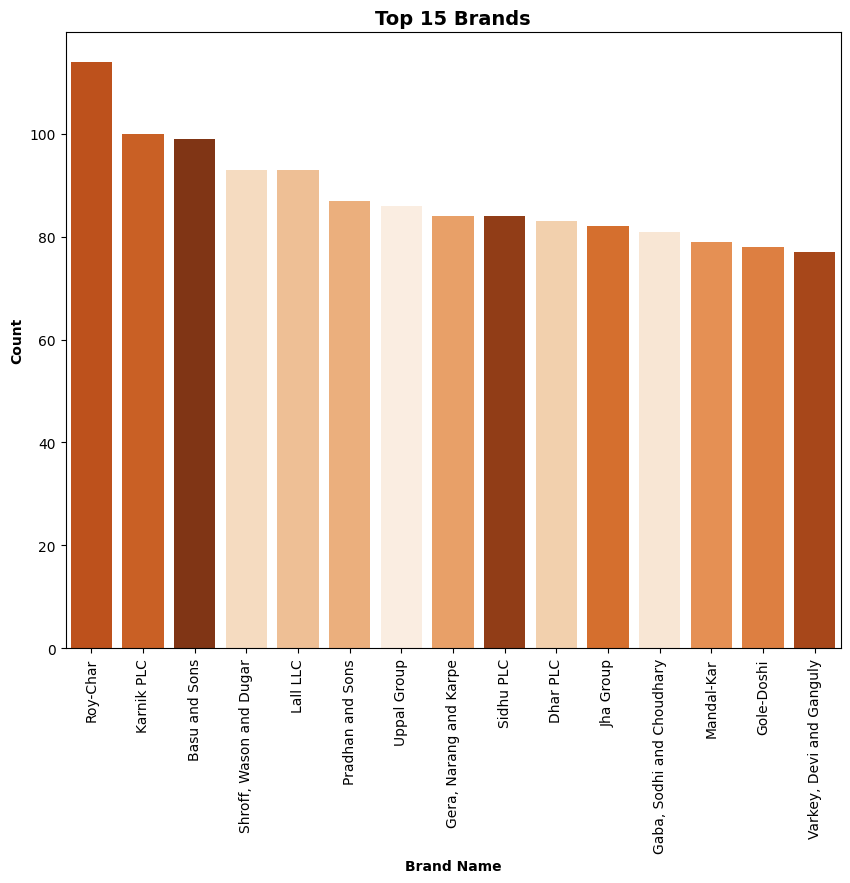

In [34]:
top15 = Blinkit_Sales['brand'].value_counts().head(15).index
Blinkit_Sales_top15 = Blinkit_Sales[Blinkit_Sales['brand'].isin(top15)]

plt.figure(figsize=(10,8))
sns.countplot(x='brand', data=Blinkit_Sales_top15, order=top15,  hue='brand', palette='Oranges', legend=False)
plt.title("Top 15 Brands", fontsize=14, fontweight='bold')
plt.xlabel('Brand Name', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

-> Conclusion of the above Graph

1. The Graph shows Top 10 Brand names according to the customer interest.
2. The Brands Roy-Char, Karnik PLC, Basu and Sons, Shroff, Wason, Lall LLC had more customer interest.
3. The Brands Pradhan and Sons, Uppal Group, Narang and Karpe, Sidhu PLC also shows good customer interest in them.

* HISTOGRAM FOR PRICE DISTRIBUTION

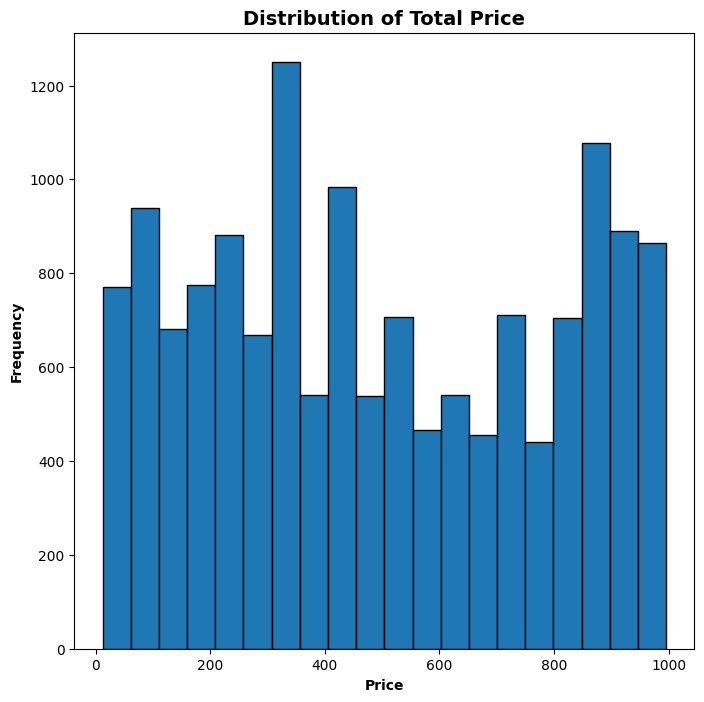

In [35]:
plt.figure(figsize=(8,8))
plt.hist(Blinkit_Sales['price'], bins=20, edgecolor='black')
plt.title("Distribution of Total Price", fontsize=14, fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

-> Conclusion of the above Graph

1. Most of the Products comes in Medium-Low Price range between 0 to 500.
2. Very less Products are of High Price like 800-1200 Price range.
3. Distribution is Right-Skewed (Most items are cheap but some expensive items are also there).

In [36]:
Blinkit_Sales['order_date'] = pd.to_datetime(Blinkit_Sales['order_date'])  # Conversion of order date to datetime

In [37]:
Blinkit_Sales['Order_Month'] = Blinkit_Sales['order_date'].dt.month_name() # Conversion of date to month

* COUNT PLOT FOR MONTH WISE ORDER TREND

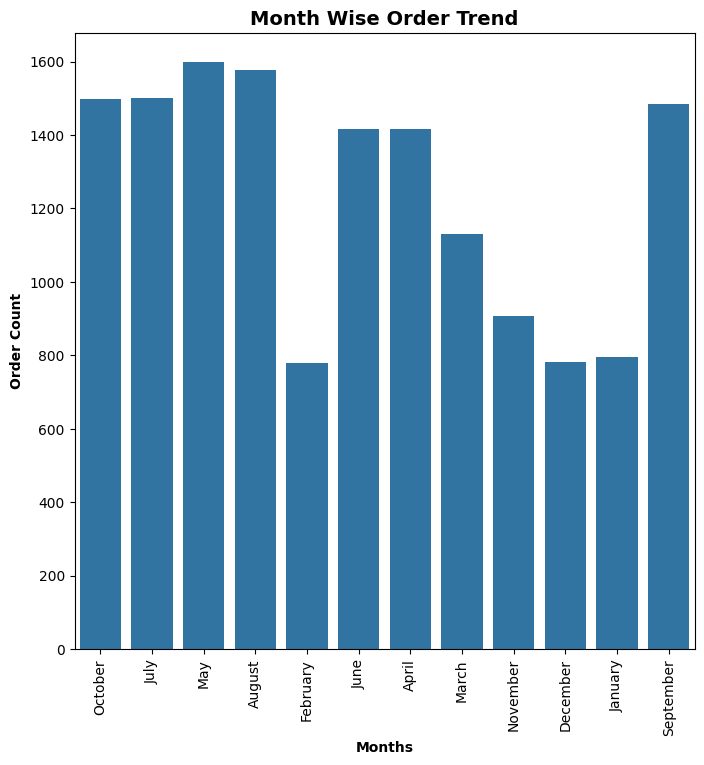

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(x='Order_Month', data=Blinkit_Sales)
plt.title("Month Wise Order Trend", fontsize=14, fontweight='bold')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Order Count', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

-> Conclusion of the above Graph

1. Most Ordering or Selling months are May, August, July, September and October.
2. June and April had also good number of Orders.
3. Least Ordering months are January, February, November and December.
4. The Over all Graph shows that Summer and Spring Season had good amount of order but Winter had very Less number of Orders. 

* HISTROGRAM FOR DISTRIBUTION OF ORDER_TOTAL

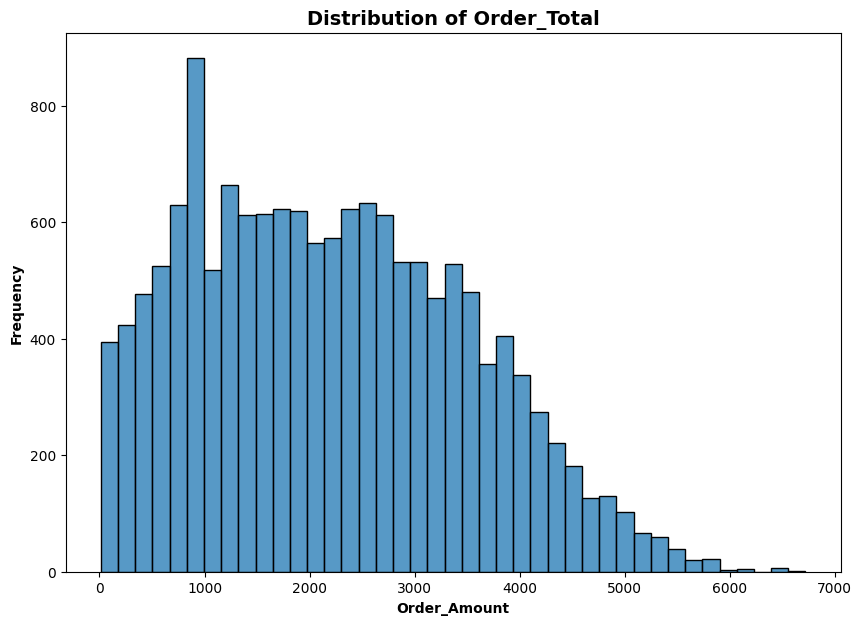

In [39]:
plt.figure(figsize=(10,7))
sns.histplot(Blinkit_Sales['order_total'], edgecolor='black')
plt.title("Distribution of Order_Total", fontsize=14, fontweight='bold')
plt.xlabel('Order_Amount', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

-> Conclusion of the above Graph

1. The Distribution is Right-Skewed.
2. Most of the Orders are of Low to Medium Priced 1000-3000 range.
3. High price orders are very few like more than 4000.
4. Most Customers placed Small or Moderate amount of Orders. 

* PIE CHART FOR PROPORTION OF PAYMENT METHOD

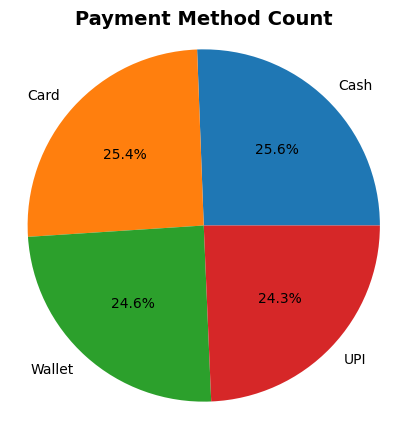

In [40]:
plt.figure(figsize=(5,5))
counts = Blinkit_Sales['payment_method'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Payment Method Count', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

-> Conclusion of the above Graph

1. Almost the Proportion of all payment methods like Cash, Card, Wallet and UPI are same.
2. There is very less differences in Payment Methods. 

* HISTOGRAM FOR THE QUANTITY DISTRIBUTION

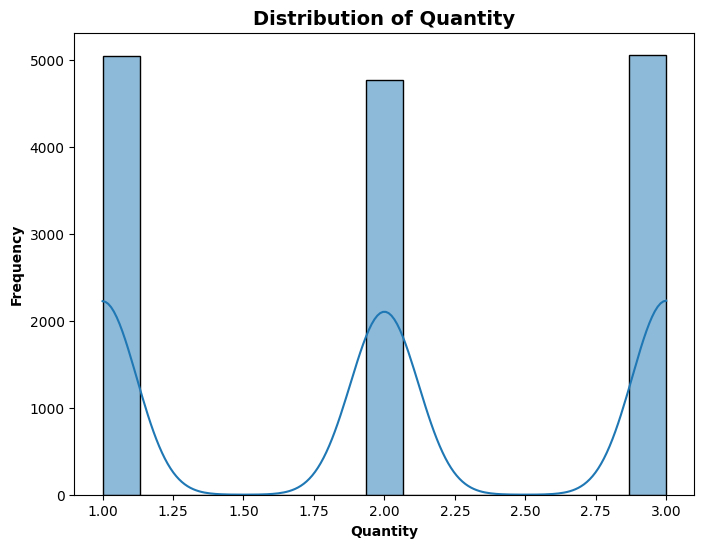

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(Blinkit_Sales['quantity'], edgecolor='black', kde=True)
plt.title("Distribution of Quantity", fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

-> Conclusion of the above Graph

1. Customer buying behaviour shows small, frequent purchases.
2. Mostly 1 or 2 items per order.
3. Higher quantities are very rare means customer don't buy many items at once.

* COUNTPLOT FOR AREA _WISE CUSTOMER DISTRIBUTION

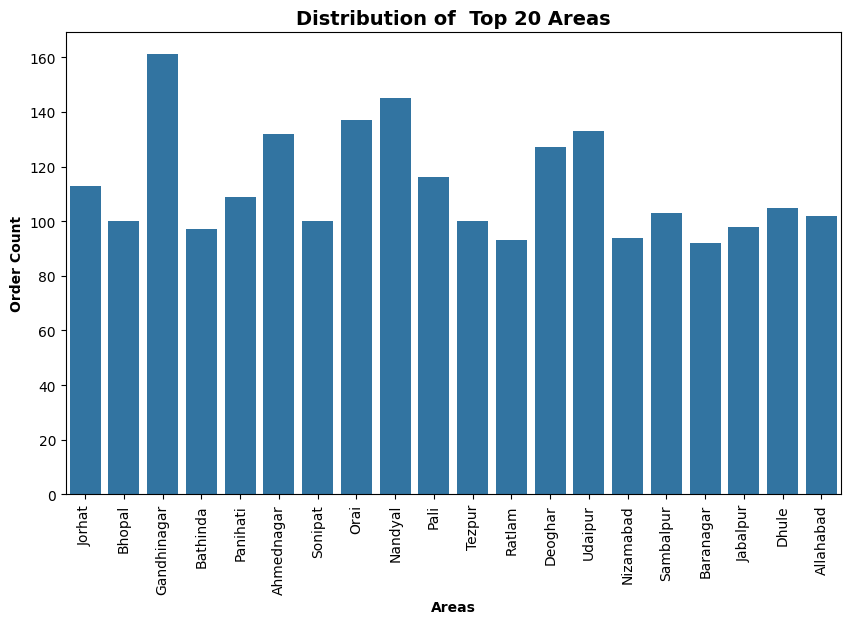

In [42]:
top20 = Blinkit_Sales['area'].value_counts().head(20).index
Blinkit_Sales_top20 = Blinkit_Sales[Blinkit_Sales['area'].isin(top20)]

plt.figure(figsize=(10,6))
sns.countplot(x='area', data=Blinkit_Sales_top20)
plt.title("Distribution of  Top 20 Areas", fontsize=14, fontweight='bold')
plt.xlabel('Areas', fontweight='bold')
plt.ylabel('Order Count', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

-> Conclusion of the above Graph

1. The Graph shows Top 20 Areas from where there are maximum orders.
2. More Orders are from Gandhinagar, Ahmednagar, Orai, Nandyal, Udaipur and Deoghar more than 120 numbers.
3. Bhopal, Bathinda, Ratlam, Tezpur, Nizamabad, Sambalpur, Jabalpur like areas has very less orders.

* PIE CHART FOR COUNT OF CUSTOMER_SEGMENT

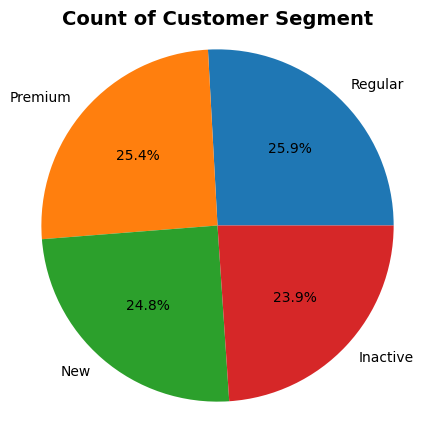

In [43]:
plt.figure(figsize=(5,5))
counts = Blinkit_Sales['customer_segment'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Count of Customer Segment', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

-> Conclusion of the above Graph

1. Regular and Premium customers had almost same proportion. (Regular customers are consistent customers who actively use the Platform & Premium customers places high-value Orders).
2. New customers had 24.8% from 100% they are newly joined but made good orders.
3. 23.9% are Inactive they are Dormant customers.

* BOX PLOT FOR TOTAL ORDERS

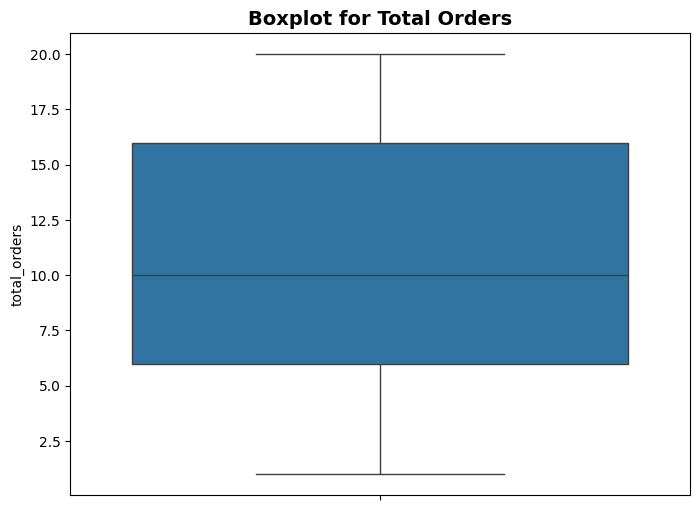

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(data=Blinkit_Sales, y='total_orders')
plt.title("Boxplot for Total Orders", fontsize=14, fontweight='bold')
plt.show()

-> Conclusion of the above Graph

1. Maximum number of orders made by a single customer is 20.
2. Minimum number of orders made by a single customer is 1.
3. Half of the customer placed total_order below 10 and half above 10.
4. Most Customers placed orders between 5 to 15.

* HISTOGRAM FOR DISTRIBUTION OF AVERAGE ORDER VALUE

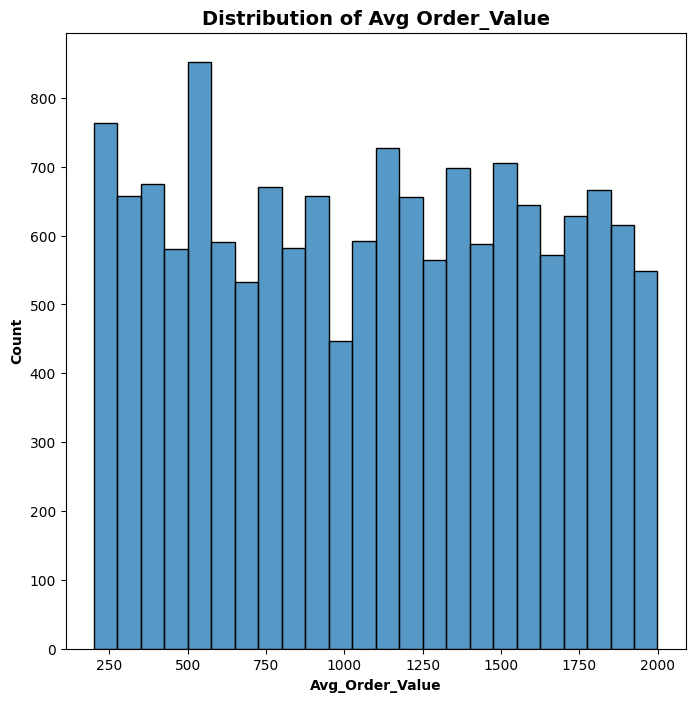

In [45]:
plt.figure(figsize=(8,8))
sns.histplot(Blinkit_Sales['avg_order_value'], edgecolor='black')
plt.title("Distribution of Avg Order_Value", fontsize=14, fontweight='bold')
plt.xlabel('Avg_Order_Value', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

* COUNTPLOT FOR COUNT OF RATING

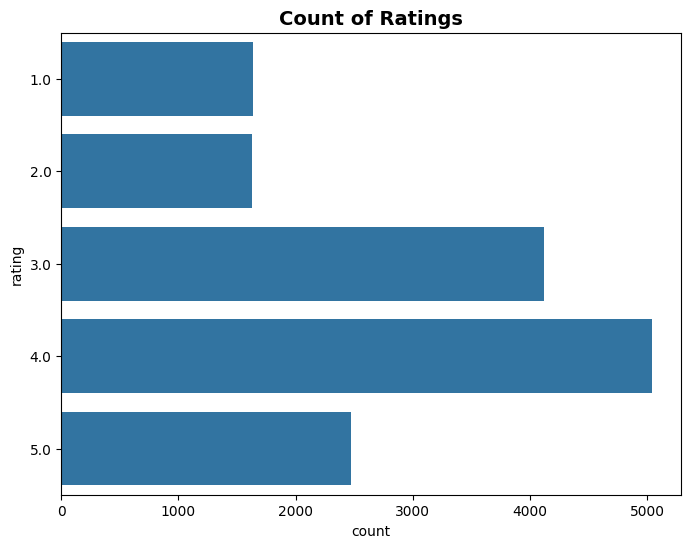

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(data=Blinkit_Sales, y='rating')
plt.title("Count of Ratings", fontsize=14, fontweight='bold')
plt.show()

-> Conclusion of the above Graph

1. Approx 5000 orders had 4 rating and 4000 had 3 rating which is very good.
2. Below 2000 orders had 2 or 1 rating.
3. 2500 orders had 5 rating.
4. The over all rating is good according to order placed.

* PIE CHART FOR FEEDBACK PROPORTION

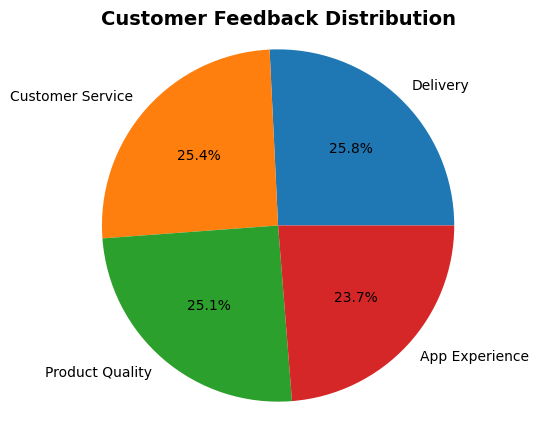

In [47]:
plt.figure(figsize=(5,5))
counts = Blinkit_Sales['feedback_category'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Customer Feedback Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

-> Conclusion of the above Graph

1. The feedback of customers is almost same for all except App Experience.
2. Customer gives their feedback mostly for Delivery and Customer Services.
3. Least feedback for App Experience.

* PIE CHART FOR SENTIMENTS OVERVIEW

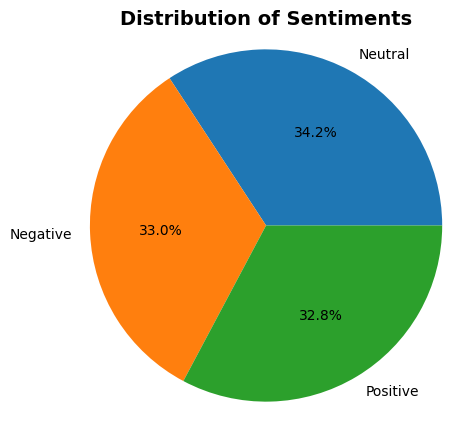

In [48]:
plt.figure(figsize=(5,5))
counts = Blinkit_Sales['sentiment'].value_counts()
labels = counts.index
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Sentiments", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

-> Conclusion of the above Graph

1. Most Customers had Neutral Sentiments means Average Experience.
2. After the Neutral, Negative Sentiemts are more which is 33.0% means Customers are Unsatisfied.
3. Postive Sentiment is less than the other two which is 32.8%. Least Customers are happy with the Product or Service. 

## BIVARIATE ANALYSIS

* SALES BY PRODUCT NAME

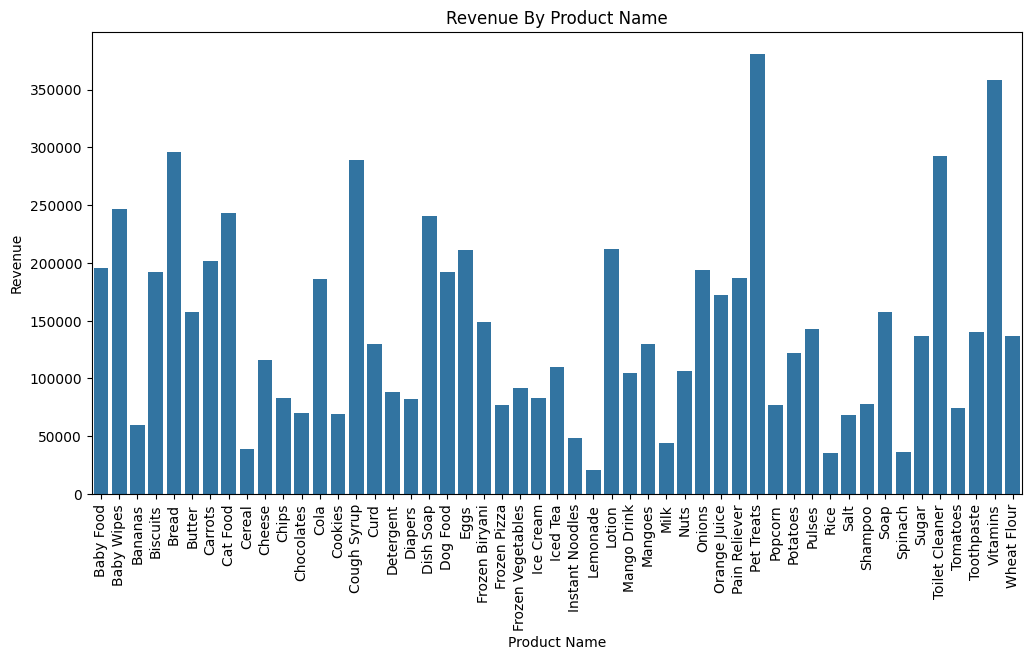

In [49]:
Product_Sales = Blinkit_Sales.groupby('product_name')['price'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=Product_Sales, x='product_name', y='price')
plt.title("Revenue By Product Name")
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

-> Conclusion of the Above Graph

1. The highest revenue is from Pet Treats and Vitamins.
2. Lemonamde, Cereal, Rice, Spinach, Milk gives the revenue below 50000.
3. Most of the Products gives less revenue below 300000.

* PRICE VS MRP

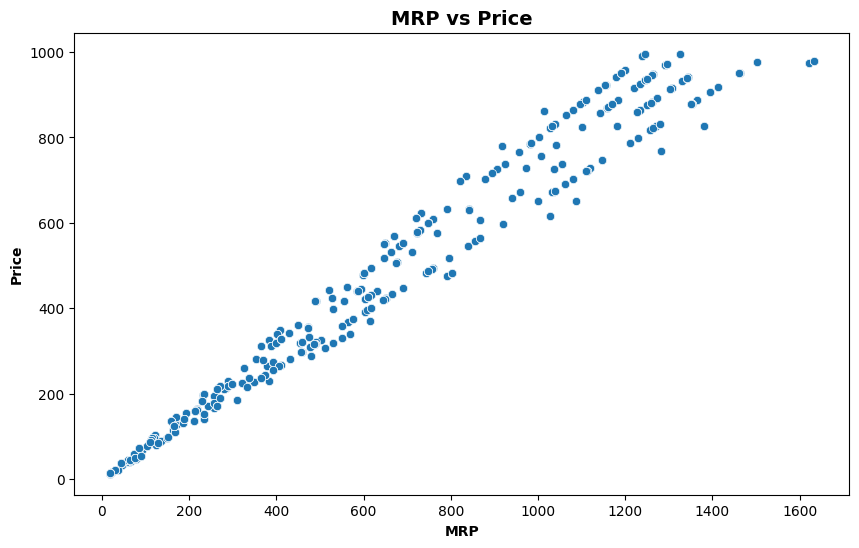

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Blinkit_Sales, x='mrp', y='price')
plt.title("MRP vs Price", fontsize=14, fontweight='bold')
plt.xlabel('MRP', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.show()

-> Conclusion of the Above Graph

1. In Above Graph as the MRP increases Price also increases (MRP high -> Price high).
2. As usual Selling Price is less then the MRP.
3. All the scatter points almost forms a straight line means their is a fixed rule for Price decide.
4. Very less Outliers (Unusual discount).

* SALES BY CATEGORY

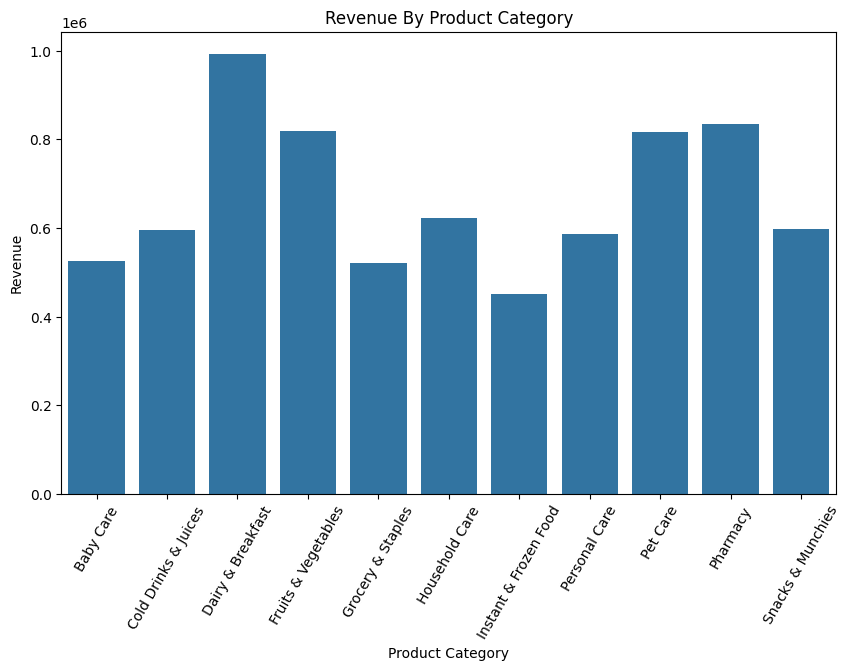

In [51]:
Category_Sales = Blinkit_Sales.groupby('category')['price'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=Category_Sales, x='category', y='price')
plt.title("Revenue By Product Category")
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=60)
plt.show()

-> Conclusion of the Above Graph

1. Dairy & Breakfast have high demands and sales, Fruits & Vegetables also have high demands.
2. Cold drinks & Juices, Snacks & Munchies, Pet Care and Pharmacy also gives good revenue.
3. Household Care, Baby Care and Personal Care have moderate revenue.
4. It tells that Daily-need, Food-related Items contibute to more revenue.

* REVENUE BY THE BRAND'S

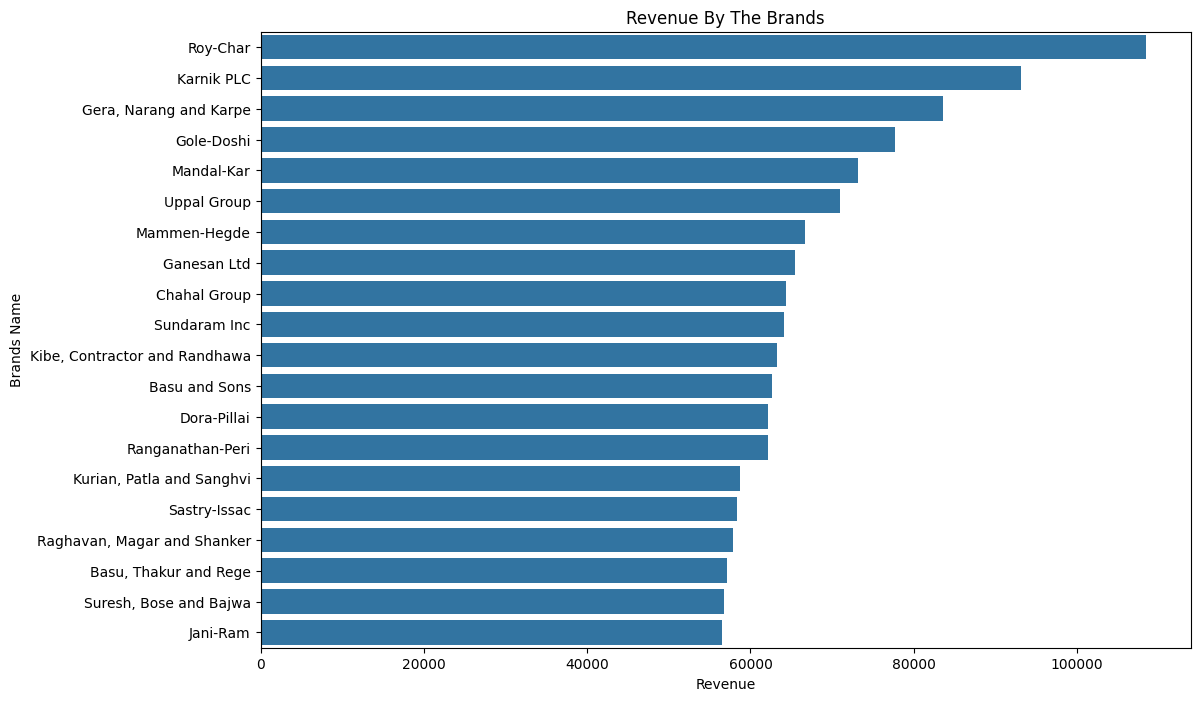

In [52]:
TopBrands_Sales = Blinkit_Sales.groupby('brand')['price'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=TopBrands_Sales.values, y=TopBrands_Sales.index)
plt.title("Revenue By The Brands")
plt.xlabel('Revenue')
plt.ylabel('Brands Name')
plt.show()

-> Conclusion of the Above Graph

1. Roy-Char and Karnik PLC contribute to revenue more than 90000.
2. Suresh, Bose and Bajwa and Jani-Ram contibute lowest to the revenue less than 60000.
3. Gera, Narang and Karpe have also good contibution to the revenue.

* MARGIN PERCENT ACROSS CATEGORIES

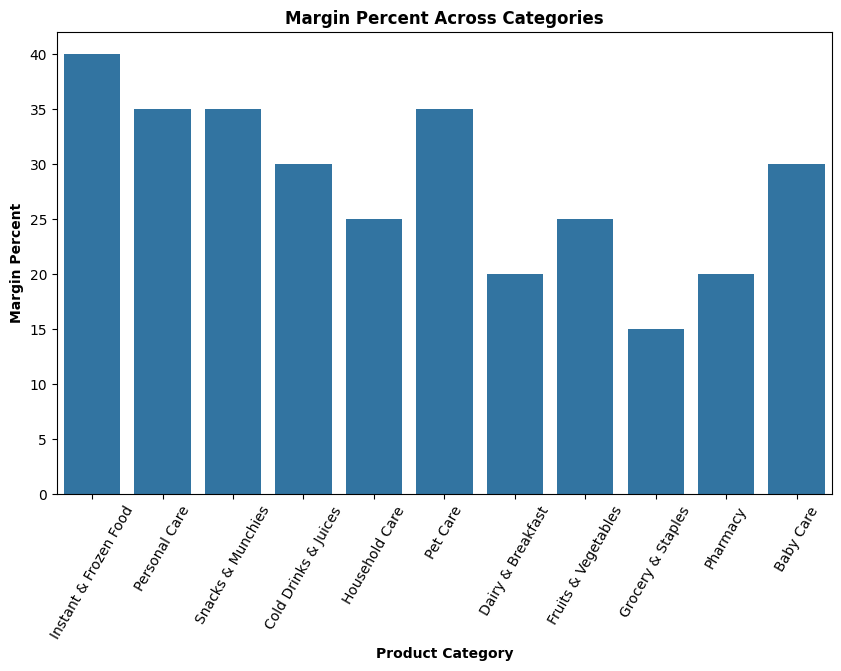

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=Blinkit_Sales, x='category', y='margin_percentage')
plt.title("Margin Percent Across Categories", fontweight='bold')
plt.xlabel('Product Category', fontweight='bold')
plt.ylabel('Margin Percent', fontweight='bold')
plt.xticks(rotation=60)
plt.show()

-> Conclusion of the Above Graph

1. Instant & Frozen Food has highest Margin approx 40%.
2. The Category Personal Care, Snacks & Munchies and Pet Care also have Good Margin almost 35% .
3. Grocery & Staples have less Margin compare than other Categories.
4. Almost all the Categories have high Margin above 20% .

* MARGIN PERCENT ACROSS TOP 20 BRANDS

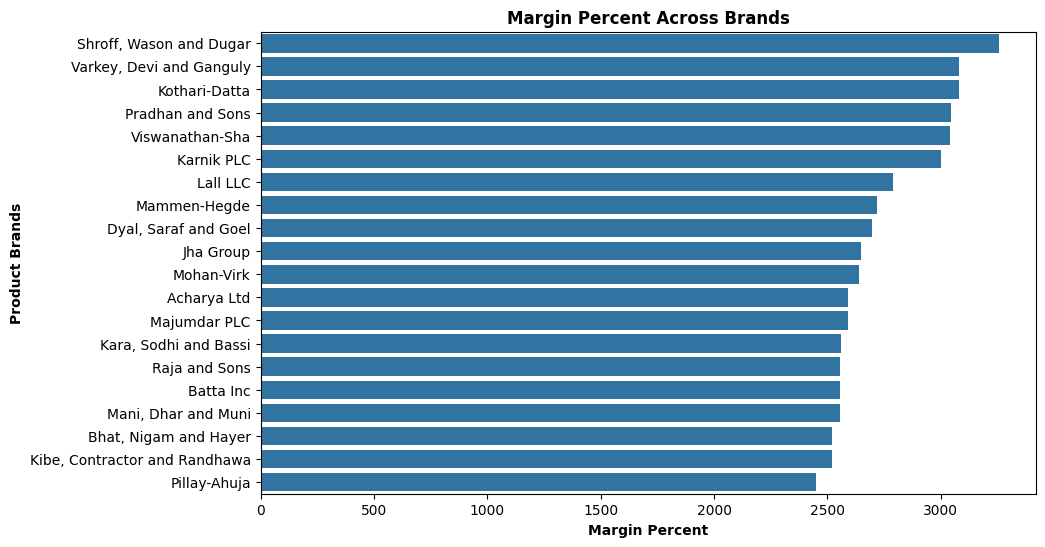

In [54]:
Brand_Wise_Margin = Blinkit_Sales.groupby('brand')['margin_percentage'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=Brand_Wise_Margin.values, y=Brand_Wise_Margin.index)
plt.title("Margin Percent Across Brands", fontweight='bold')
plt.xlabel('Margin Percent', fontweight='bold')
plt.ylabel('Product Brands', fontweight='bold')
plt.show()

-> Conclusion of the Above Graph

1. Shroff, Wasen and Dugar are the brands with top contribution of 3000+ rs.
2. Pillay-Ahuja is the brand with lowest contribuion of across 2400 rs.

* ORDER TOTAL BADES ON PURCHASED QUANTITY

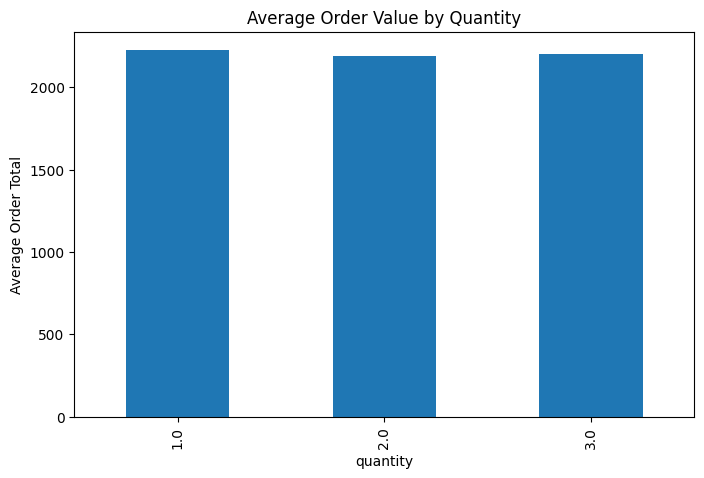

In [55]:
Blinkit_Sales.groupby("quantity")["order_total"].mean().plot(kind='bar', figsize=(8,5))
plt.title("Average Order Value by Quantity")
plt.ylabel("Average Order Total")
plt.show()


**Conclusion of above graph**
- Order quantity 1, 2, 3 have equal order_value.

* CUSTOMER SEGMENT vs AVG_ORDER_VALUE

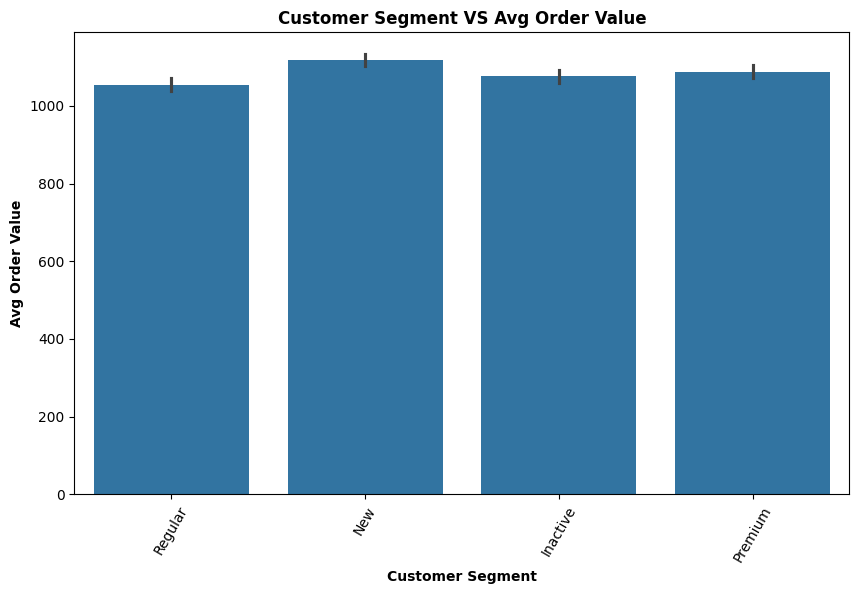

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=Blinkit_Sales, x='customer_segment', y='avg_order_value')
plt.title("Customer Segment VS Avg Order Value", fontweight='bold')
plt.xlabel('Customer Segment', fontweight='bold')
plt.ylabel('Avg Order Value', fontweight='bold')
plt.xticks(rotation=60)
plt.show()

-> Conclusion of the Above Graph

1. New Customers have the highest Avg Order_Value.
2. Premium and Inactive Customers have almost same Avg Order_Value approx 1100.
3. Almost all Customer Segment have same Avg Order_VAlue there is only less incement in New one and less decrement in Regular one.

* CUSTOMER SEGEMENT-WISE ORDER COUNT

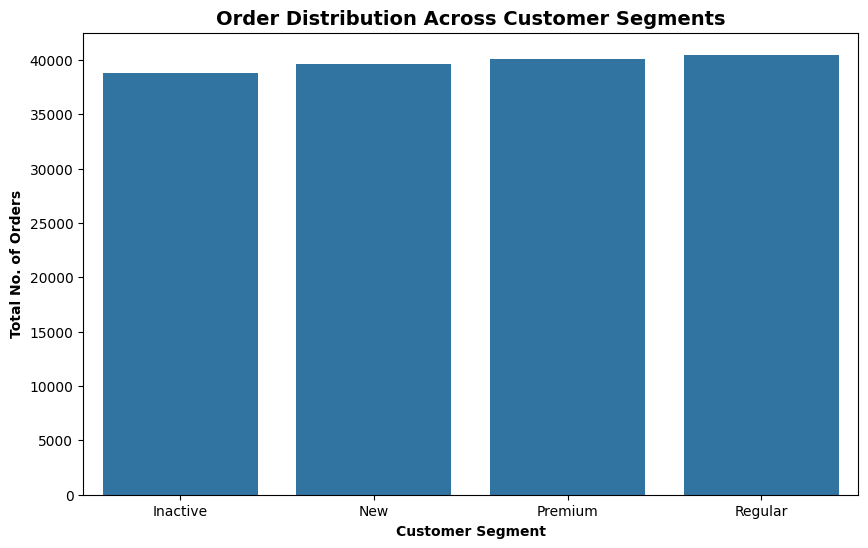

In [57]:
ocs = Blinkit_Sales.groupby('customer_segment')['total_orders'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=ocs, x='customer_segment', y='total_orders')
plt.title("Order Distribution Across Customer Segments", fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontweight='bold')
plt.ylabel('Total No. of Orders', fontweight='bold')
plt.show()

-> Conclusion of the Above Graph

1. Regular Customer Places more numbers of Orders which gives the Majority Sales.
2. Premium Customers are 2nd contributor to Sales by giving more Orders.
3. New Customers are making Orders but the number of Orders are Moderate .
4. Inactive Customers places the Order very rarely.

* DISTRIBUTION OF PAYMENT METHOD BY ORDER TOTAL

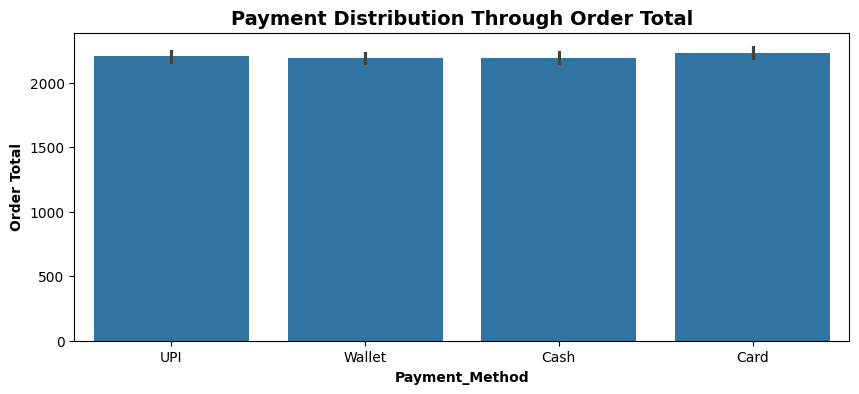

In [58]:
plt.figure(figsize=(10,4))
sns.barplot(data=Blinkit_Sales, x='payment_method', y='order_total')
plt.title("Payment Distribution Through Order Total", fontsize=14, fontweight='bold')
plt.xlabel('Payment_Method', fontweight='bold')
plt.ylabel('Order Total', fontweight='bold')
plt.show()

-> Conclusion of the Above Graph

1. Most of the Payment for Order total are done by UPI and Card.
2. Wallet is the Second highest Payment Method used.
3. Less Customers depends on Cash on Delivery.

* MONTHLY TREND OF TOTAL ORDERS

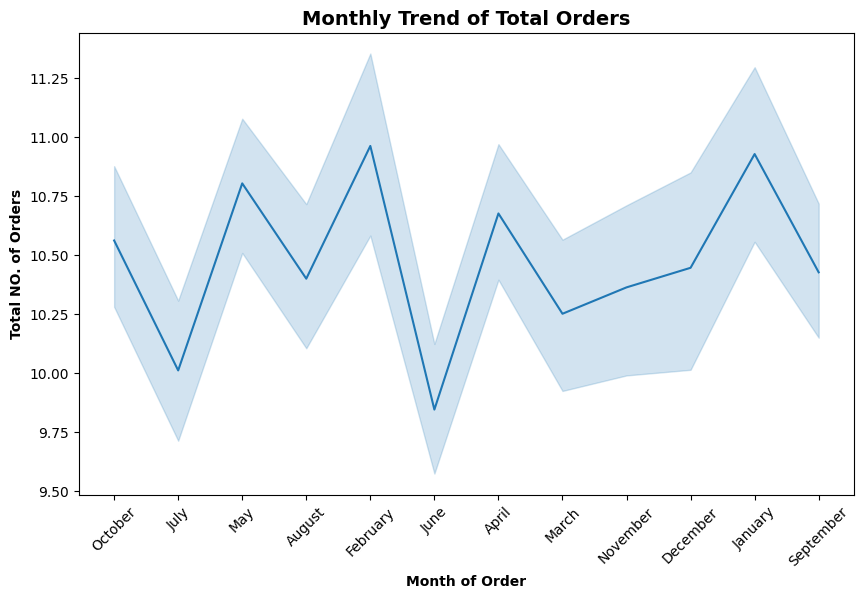

In [59]:
plt.figure(figsize=(10,6))
sns.lineplot(data=Blinkit_Sales, x='Order_Month', y='total_orders')
plt.title("Monthly Trend of Total Orders", fontsize=14, fontweight='bold')
plt.xlabel('Month of Order', fontweight='bold')
plt.ylabel('Total NO. of Orders', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

-> Conclusion of the Above Graph

1. February and January Months have more number of Orders.
2. June and July Months have least number of Orders.
3. May, April and October also have good numbers of Orders.
4. Overall Graph shows that Cold months have more number of Orders.

* COMPARISON OF DELIVERY STATUS AND SENTIMENTS

<Figure size 1200x600 with 0 Axes>

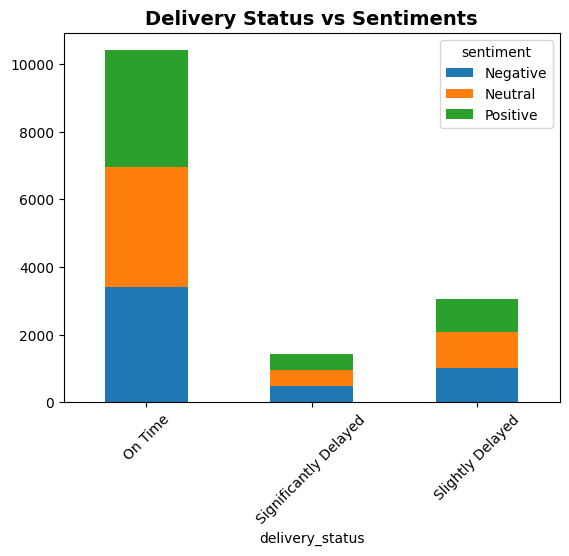

In [60]:
plt.figure(figsize=(12,6))
pd.crosstab(Blinkit_Sales['delivery_status'],Blinkit_Sales['sentiment']).plot(kind='bar',stacked=True)
plt.title("Delivery Status vs Sentiments", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

-> Conclusion of the Above Graph

1. 'On Time' Delivery_Status has more sentiments and in this the Share of Positive Sentiments is largest.
2. Slightly Delayed has Moderate Sentiments means Customer Experience does not impact on Slightly delay.
3. Significantly Delayed Deliveries has less Customer response.
4. Better the Delivery Timing - Positive Customer Sentiments.

* COMPARISON OF FEEDBACK CATEGORY AND SENTIMENTS

<Figure size 1000x400 with 0 Axes>

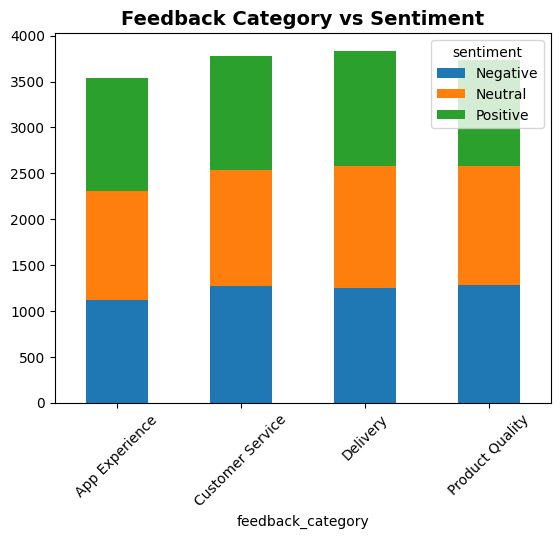

In [61]:
plt.figure(figsize=(10,4))
pd.crosstab(Blinkit_Sales['feedback_category'],Blinkit_Sales['sentiment']).plot(kind='bar',stacked=True)
plt.title("Feedback Category vs Sentiment", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

-> Conclusion of the Above Graph

1. Customer has given more feedback to the Delivery where all the Sentiments are almost equal.
2. Customer Service and Product Quality have almost equal feedbacks but in Product Quality the Neutral Sentiments are more.
3. App Experience has less Feedbacks compare to all but it has more Positive Sentiments.

## MULTIVARIATE ANALYSIS

* CATEGORY + PRICE + MARGIN%

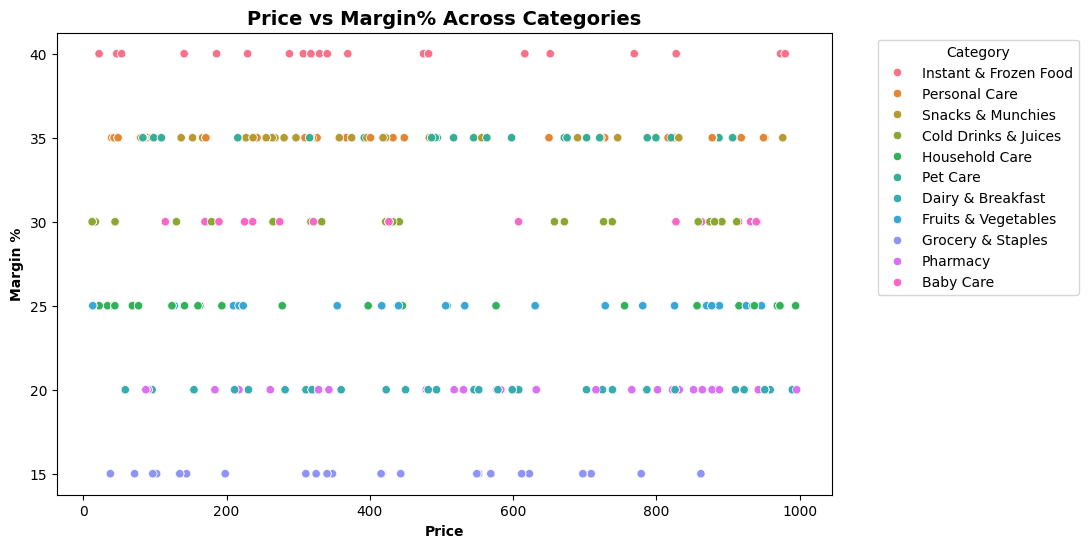

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=Blinkit_Sales, x='price', y='margin_percentage', hue='category')
plt.title("Price vs Margin% Across Categories", fontsize=14, fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Margin %', fontweight='bold')

plt.legend(title='Category',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

* CUSTOMER SEGMENT + AVG ORDER VALUE + TOTAL ORDERS

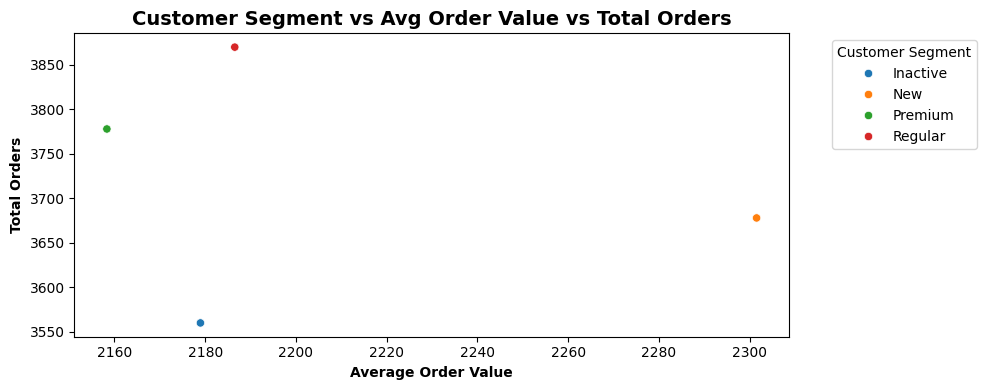

In [63]:
CAT = Blinkit_Sales.groupby('customer_segment').agg(
    total_orders=('order_id','count'),
    avg_order_value=('order_total','mean')).reset_index()

plt.figure(figsize=(10,4))
sns.scatterplot(data=CAT, x='avg_order_value', y='total_orders', hue='customer_segment')
plt.title("Customer Segment vs Avg Order Value vs Total Orders", fontsize=14, fontweight='bold')
plt.xlabel('Average Order Value', fontweight='bold')
plt.ylabel('Total Orders', fontweight='bold')

plt.legend(title='Customer Segment',bbox_to_anchor=(1.05,1),loc='upper left')  # to shift the legend outside
plt.tight_layout()   # to give the proper spacing
plt.show()

**Conclusion for above graph**
- The Regular and Premium customers have very high order count but their average order_value is very low.
- The New customers have very high average order_value but low order count.
- The inactive customers have both the order count and the aveage order value is low.

* FEEDBACK CATEGORY + RATING + SENTIMENTS    

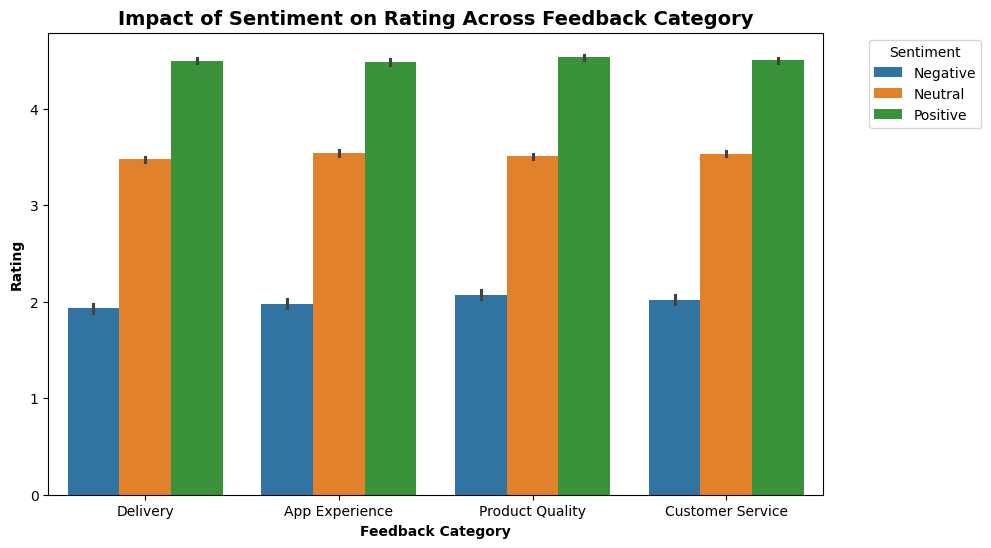

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(data=Blinkit_Sales, x='feedback_category', y='rating', hue='sentiment')
plt.title("Impact of Sentiment on Rating Across Feedback Category", fontsize=14, fontweight='bold')
plt.xlabel('Feedback Category', fontweight='bold')
plt.ylabel('Rating', fontweight='bold')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

* ORDER MONTH + TOTAL ORDERS + PAYMENT METHOD

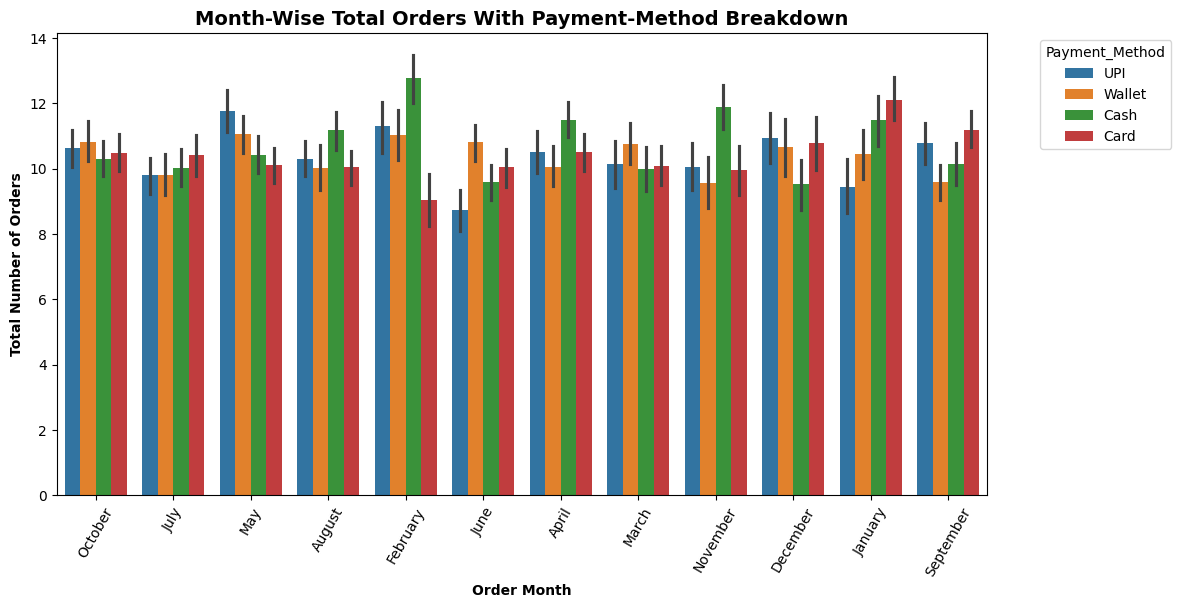

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=Blinkit_Sales, x='Order_Month', y='total_orders', hue='payment_method')
plt.title("Month-Wise Total Orders With Payment-Method Breakdown", fontsize=14, fontweight='bold')
plt.xlabel('Order Month', fontweight='bold')
plt.ylabel('Total Number of Orders', fontweight='bold')
plt.legend(title='Payment_Method', bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=60)
plt.show()

* DISTANCE + DELIVERY TIME + DELIVERY STATUS

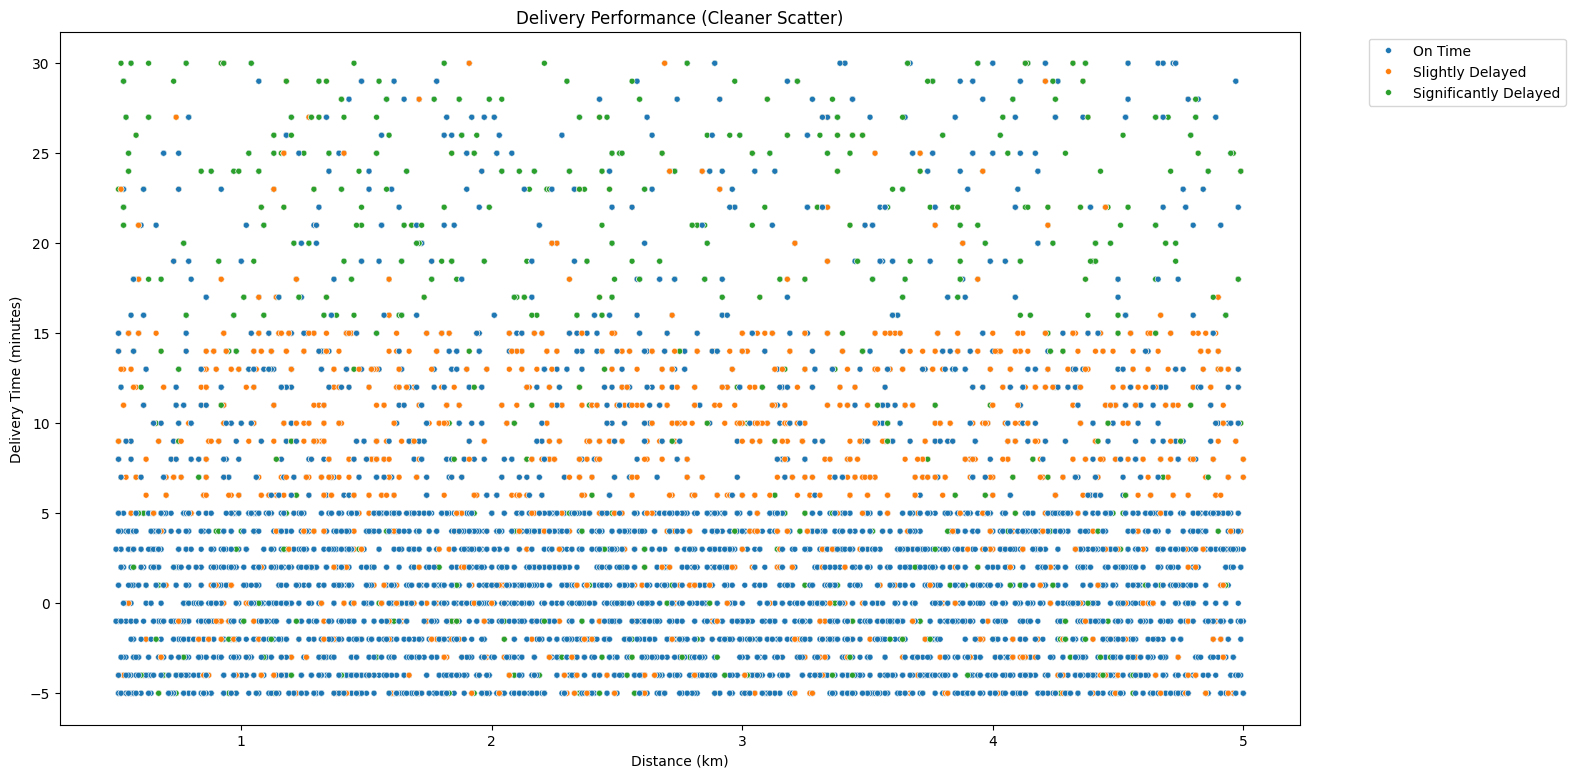

In [66]:
plt.figure(figsize=(16,9))
sns.scatterplot(
    data=Blinkit_Sales,
    x='distance_km',
    y='delivery_time_minutes',
    hue='delivery_status',
    s=18       
)
plt.title("Delivery Performance (Cleaner Scatter)")
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (minutes)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()


<Figure size 1400x900 with 0 Axes>

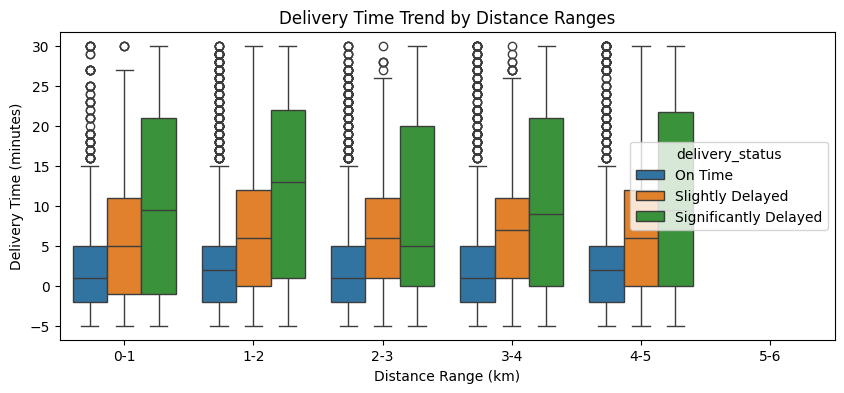

In [67]:
plt.figure(figsize=(14,9))
Blinkit_Sales['dist_bin'] = pd.cut(
Blinkit_Sales['distance_km'],
bins=[0,1,2,3,4,5,6],
labels=['0-1','1-2','2-3','3-4','4-5','5-6']
)

plt.figure(figsize=(10,4))
sns.boxplot(
    data=Blinkit_Sales,
    x='dist_bin',
    y='delivery_time_minutes',
    hue='delivery_status'
)
plt.title("Delivery Time Trend by Distance Ranges")
plt.xlabel('Distance Range (km)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


**Conclusion of above plots**
- From the above graph we can see that the delivery time increases as the distance increases.
- Most orders stay under 10 minutes even at 5–6 km.
- There are some orders which takes very long time o deliver.

In [68]:
Blinkit_Sales.to_csv("Blinkit_export.csv",index=False)